In [32]:
import pandas as pd
import re
from shapely.geometry import Point, Polygon

In [38]:
nynta = pd.read_csv('../data/nynta.csv')
nynta.head()

,BoroCode,BoroName,the_geom,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area
0,3,Brooklyn,MULTIPOLYGON (((-73.97604935657381 40.63127590...,47,BK88,Borough Park,39247.227831,5.400502e+07
1,4,Queens,MULTIPOLYGON (((-73.80379022888098 40.77561011...,81,QN51,Murray Hill,33266.904797,5.248828e+07
2,4,Queens,MULTIPOLYGON (((-73.8610972440186 40.763664477...,81,QN27,East Elmhurst,19816.712074,1.972685e+07
3,4,Queens,MULTIPOLYGON (((-73.75725671509139 40.71813860...,81,QN07,Hollis,20976.335574,2.288777e+07
4,1,Manhattan,MULTIPOLYGON (((-73.94607828674226 40.82126321...,61,MN06,Manhattanville,17040.685413,1.064708e+07


In [39]:
paths = ['Hospital distribution - Open Hospitals.csv',
         'Hospital distribution - Open Hospitals corona.csv',
         'Hospital distribution - Closed Past 2000-.csv']
dfs = [pd.read_csv('../data/' + p) for p in paths]

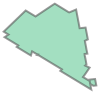

In [60]:
s = nynta['the_geom'][0]
poly = re.findall('-*\d+.\d+ -*\d+.\d+', s)
poly = [[float(j) for j in i.split( )] for i in poly]
shapely.geometry.Polygon(poly)

In [61]:
# compiles list of all polygons in list format
poly_list = []
for s in nynta['the_geom']:
    poly = re.findall('-*\d+.\d+ -*\d+.\d+', s)
    poly = [[float(j) for j in i.split( )] for i in poly]
    poly_list.append(poly)

In [64]:
def getNeighborhood(row):
    lon = row['Longitude']
    lat = row['Latitude']
    
    pt = Point(lon, lat)
    for i, poly_l in enumerate(poly_list):
        poly = Polygon(poly_l)
        if poly.contains(pt):
            return nynta['NTAName'][i]
    return -1

In [66]:
for df, path in zip(dfs, paths):
    df['NTAName'] = df.apply(getNeighborhood, axis=1)
    df.to_csv('../data/updated_' + path, index=False)